# 14. 카메라 스티커앱을 개선하자!

## 14-2. 프로젝트 (1) moviepy로 비디오 처리하기

In [1]:
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.editor import ipython_display
import cv2
import numpy as np
import os

In [2]:
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
#ipython_display() 는 동영상을 주피터 노트북에 렌더링할 수 있게 도와주는 함수.
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

result_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
clip.write_videofile(result_video_path)

Moviepy - Building video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4.
MoviePy - Writing audio in mvpyresultTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4


In [3]:
# 위와 같이 동영상을 다시 읽어줍니다. 
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# clip에서 numpy로 데이터를 추출합니다. 
vlen=int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)
for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    # 어둡게 만들기
    video_container[i] = (img * 0.5).astype(np.uint8)
    
# 새 clip 만들기 
dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

# 쓰기
result_video_path2 = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult2.mp4'
outclip.write_videofile(result_video_path2, fps=30)

t:  12%|█▏        | 48/403 [00:00<00:00, 473.94it/s, now=None]

Moviepy - Building video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult2.mp4.
Moviepy - Writing video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult2.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult2.mp4


In [4]:
start = cv2.getTickCount()
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)

vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)

for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

mvpy_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
outclip.write_videofile(mvpy_video_path, fps=30)

time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] moviepy time : {time:.2f}ms')

t:  12%|█▏        | 48/403 [00:00<00:00, 472.27it/s, now=None]

Moviepy - Building video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4.
Moviepy - Writing video /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-dj50/aiffel/video_sticker_app/images/mvpyresult.mp4
[INFO] moviepy time : 3.10ms


In [5]:
start = cv2.getTickCount()
vc = cv2.VideoCapture(video_path)

cv_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/cvresult.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
vw = cv2.VideoWriter(cv_video_path, fourcc, 30, (640,360))

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(vlen):
    ret, img = vc.read()
    if ret == False: break
    
    img_result = cv2.resize(img, (640, 360)) * 0.5
    vw.write(img_result.astype(np.uint8))
    
time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] cv time : {time:.2f}ms')

[INFO] cv time : 1.59ms


#### moviepy time : 3.10ms, cv time : 1.59ms의 결과가 나왔습니다. OpenCV를 사용할때 속도가 조금더 빠른것 같네요.

## 14-3. 프로젝트 (2) 어디까지 만들고 싶은지 정의하기

### 1. 실시간 카메라 스티커앱을 만들어봅시다.

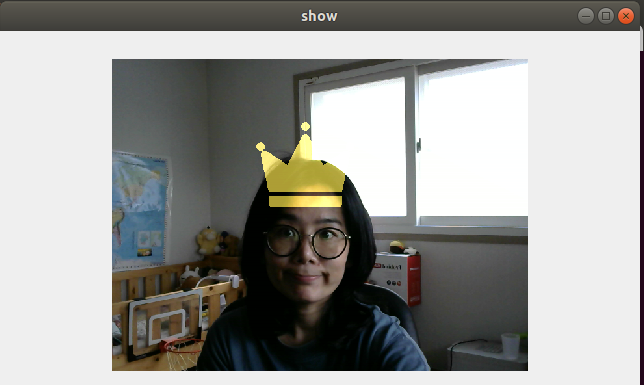

### 2. 스티커앱을 실행하고 카메라를 고정하고 서서히 멀어져봅니다. 혹은 아주 가까이 다가가 봅니다. 얼굴을 찾지 못하는 거리를 기록해주세요.

#### 실험결과 30cm보다 가까이 가면 인식이 안되서 왕관이 사라졌고 2m 보다 멀어져도 인식을 못했습니다.

### 3. 다시 자리로 돌아온 후 고개를 상하좌우로 움직여주세요. yaw, pitch, roll 각도의 개념을 직접 실험해 보고 각각 몇 도까지 정상적으로 스티커앱이 동작하는지 기록해주세요.

    yaw : -45 ~ 45도
    pitch : -20 ~ 30도
    roll : -45 ~ 45도

실제 측정해 본 결과는 어떠한지 기록해 주세요.

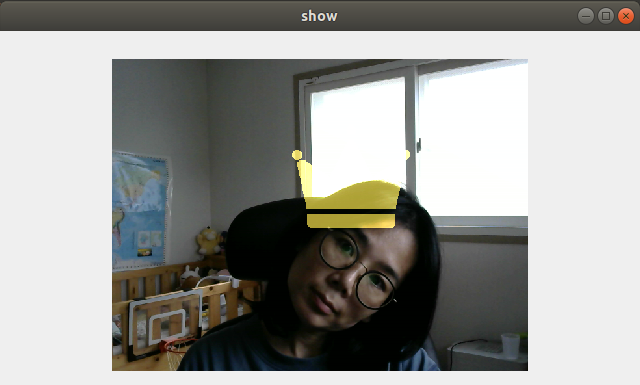

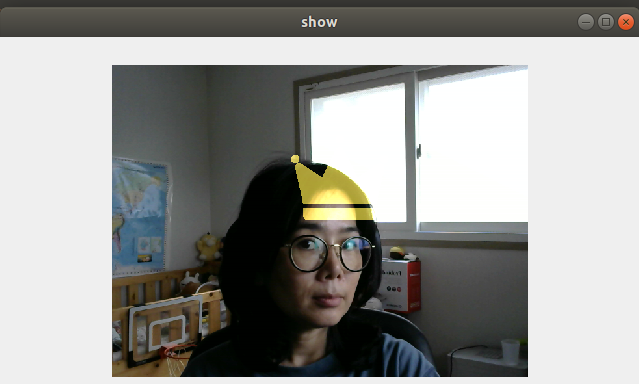

#### 사진에 보이는 각도보다 더 내려가거나 고개를 돌리면 왕관이 사라진것으로 보아     yaw : -45 ~ 45도, pitch : -20 ~ 30도, roll : -45 ~ 45도가 인식 범위인듯 싶습니다. 

### 4. 만들고 싶은 스티커앱의 스펙(허용 거리, 허용 인원 수, 허용 각도, 안정성)을 정해주세요.

(예시)

    거리 : 25cm ~ 1m → 너무 가까우면 스티커의 의미가 없음, 셀카봉을 들었을 때의 유효거리
    인원 수 : 4명 → 4인 가족 기준
    허용 각도 : pitch : -20 ~ 30도, yaw : -45 ~ 45도, roll : -45 ~ 45도 → 화면을 바라볼 수 있는 각도
    안정성 : 위 조건을 만족하면서 FPPI (false positive per image) 기준 < 0.003, MR (miss rate) < 1 300장당 1번 에러 = 10초=30*10에 1번 에러

기준의 이유를 어떻게 정했는지가 중요합니다. → 서비스 관점, 엔지니어링 관점으로 설명하면 좋습니다.

#### 거리 : 30cm~ 1m정도 셀카(셀카봉이용)를 찍을수 있는 거리면 충분할듯 합니수.    
#### 인원수 : 4명정도만 인식해도 훌륭한 앱이라고 생각합니다 기존의 스티커앱도 3명정도밖에 인식하지 못함.    
#### 허용각도 :  pitch : -20 ~ 30도, yaw : -45 ~ 45도, roll : -45 ~ 45도 → 화면을 바라볼 수 있는 각도정도면 훌륭할것 같아요.   

## 14-4. 프로젝트 (3) 스티커 Out Bound 예외처리 하기

### 1. 지금까지 만든 스티커앱을 이용해서 예외 상황을 찾아주세요. 특히 서서히 영상에서 좌우 경계 밖으로 나가며 코드의 행동을 확인해 보세요.

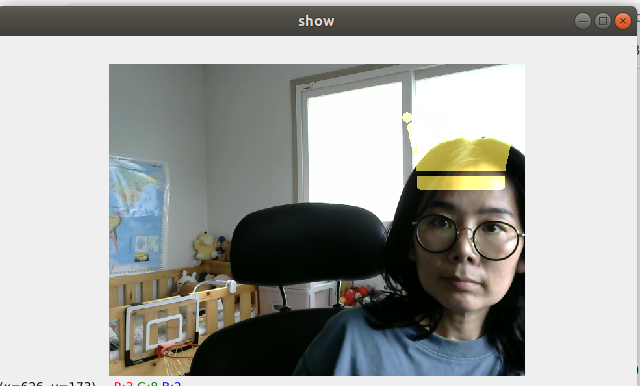

#### 얼굴이 카메라 경계를 벗어나서 detection 되는 경우 refined_x 의 값이 음수가 되는것을  수정하였습니다.

## 14-5. 프로젝트 (4) 스티커앱 분석 - 거리, 인원 수, 각도, 시계열 안정성

### 1. 멀어지는 경우에 왜 스티커앱이 동작하지 않는지 분석해주세요. detection, landmark, blending 단계 중 무엇이 문제일까요?

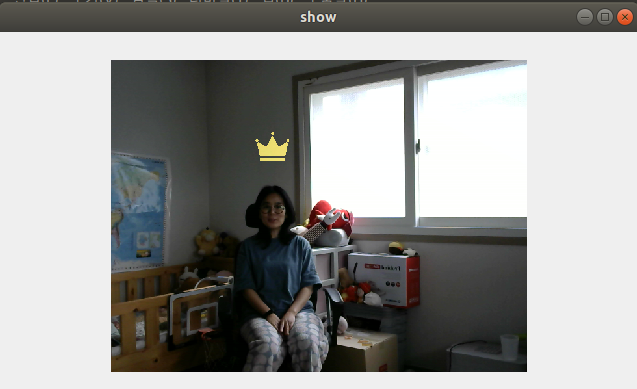

#### 카메라로 부터 2m이상 멀어졌는데도 인식이 잘 되는듯 합니다. 근데 좀 뭔가 이상하네요 왕관은 왜 공중부양 하는거지? ㅋㅋㅋ

## 14-6. 프로젝트 (5) 칼만 필터 적용하기

### 1. 카메라 앞에서 가만히 있을 때 스티커의 움직임을 관찰해 주세요. 어떤 문제가 발생하나요?

#### 칼만필터를 이해하지 못했습니다. 너무 어렵네요. 조금더 개선된 앱을 만들면 좋을텐데... 

## 총평

### 이번 과제는 뭘 하라는 건지 과제 자체를 이해 하기가 힘들었습니다. 그래서 13번 노드부터 다시 찬찬히 보고 하다보니 조금 감이 오더군요. 사진에 관심이 많은데 유독 사진 과제가 너무 어려워요. 칼만 필터까지 다 해보지 못해서 아쉬운 과제입니다. 